# Task 2: Exploratory Data Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset
df = pd.read_csv("../data/customer_booking.csv", encoding="ISO-8859-1")

# Display first five rows
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [14]:
# Display the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [15]:
# Display unique values of flight day
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [16]:
# Display basic summary statistics for numeric columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


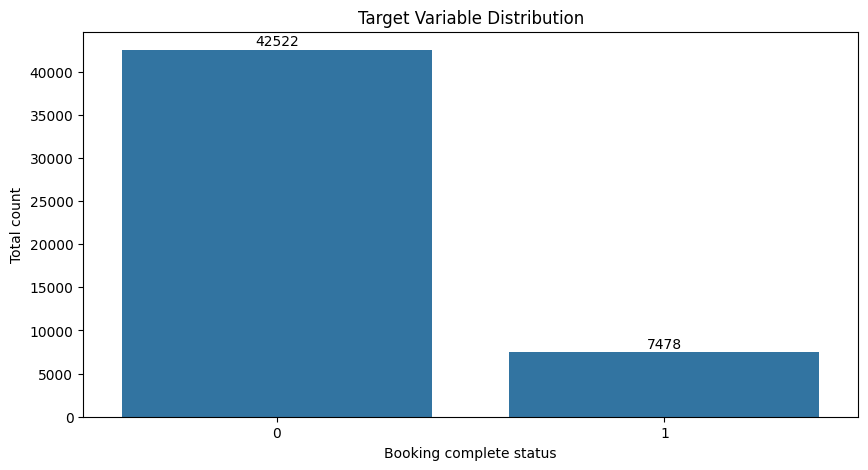

In [17]:
# Target variable distribution using count plot

plt.figure(figsize=(10, 5))

ax = sns.countplot(x='booking_complete', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, y = height + 500, s=int(height), ha='center')

plt.title("Target Variable Distribution")
plt.xlabel('Booking complete status')
plt.ylabel('Total count')
plt.show()

In [18]:
# Calculate booking rate
booking_rate = df['booking_complete'].mean() * 100

print(f'Booking rate is {booking_rate: .2f}%')

Booking rate is  14.96%


`Booking rate is  14.96%` - So the dataset is imbalanced.

In [19]:
# Booking rate by sales channel
sales_channel = df.groupby('sales_channel')['booking_complete'].mean().sort_values(ascending=False)

formatted_sales_channel = sales_channel.apply(lambda x: f"{x * 100: .2f}%")

print(f'Booking rate by sales channel:', formatted_sales_channel)

Booking rate by sales channel: sales_channel
Internet     15.48%
Mobile       10.84%
Name: booking_complete, dtype: object


Customers using the `internet` are more likely to book tickets than those using mobile.

In [20]:
# Booking rate by trip type

trip_type = df.groupby('trip_type')['booking_complete'].mean().sort_values(ascending=False)

formatted_trip_type = trip_type.apply(lambda x: f"{x *100:.2f}%")

print('Booking rate by trip type:',formatted_trip_type)

Booking rate by trip type: trip_type
RoundTrip     15.06%
OneWay         5.17%
CircleTrip     4.31%
Name: booking_complete, dtype: object


`Round Trip` type is strongly associated with complete bookings.

In [21]:
# Booking rate by flight day

flight_day = df.groupby('flight_day')['booking_complete'].mean().sort_values(ascending=False)

formatted_flight_day = flight_day.apply(lambda x: f"{x *100:.2f}%")

print('Booking rate by flight day:',formatted_flight_day)

Booking rate by flight day: flight_day
Wed    16.31%
Thu    15.11%
Mon    14.86%
Sat    14.81%
Tue    14.71%
Fri    14.54%
Sun    14.14%
Name: booking_complete, dtype: object


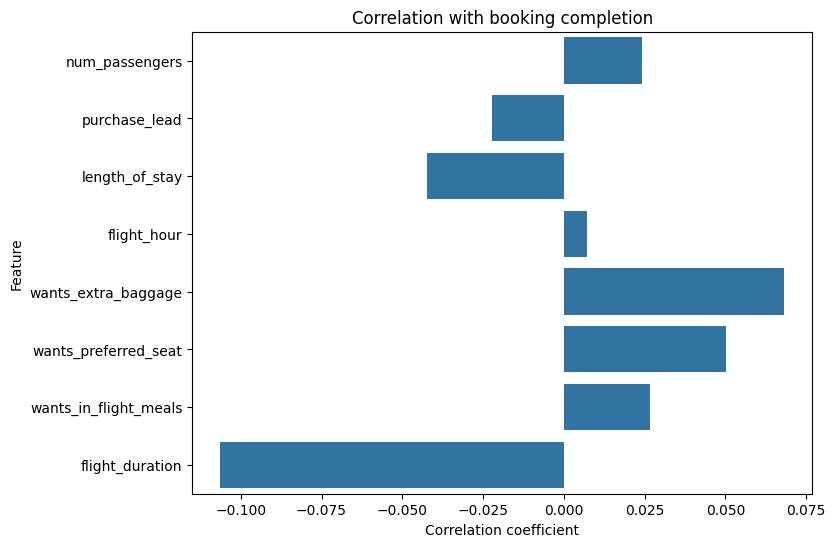

In [22]:
# Correlation with booking completion
correlation = df.corr(numeric_only=True)['booking_complete'].drop('booking_complete')

plt.figure(figsize=(8,6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation with booking completion')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.show()